In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
sns.set(color_codes=True, font_scale=1.2)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
from heatmap import heatmap, corrplot

'''Comparing hit and hit-flop datasets'''

#Get dataset an columns that will be used
hitsflops = pd.read_csv("allFlops.csv") #old dataset is billboard-hits-flops-weeks.csv
#hitsflops2 = pd.read_csv("billboardwithflops111020.csv")
#Removing flops to get an even distribution of hits and flops
#hitsflops.drop(hitsflops.tail(198).index, inplace=True)

usecols = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'sections',
        'target', 'weeks', 'artist_popularity', 'artist_followers', 
           'number_of_artists', 'popularity', 'release_date']

artistcols = ['weeks', 'artist_popularity', 'artist_followers', 
           'number_of_artists', 'popularity', 'target']

basiccols = ['danceability', 'energy', 'loudness',
             'acousticness', 'valence', 
             'duration_ms', 'target']

df = hitsflops[usecols]
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
#df['chart_year'] = pd.to_datetime(df['chart_date']).dt.year
del df['release_date']
#df['release_year'] = df['release_date'].dt.year
df.drop(df[df.release_year < 2000].index, inplace=True)
#df.drop(df.tail(7000).index, inplace=True)
artist_df = hitsflops[artistcols]

#Checking hits2
print("Number of songs in dataset: " + str(len(hitsflops.index)))
artists2 = hitsflops.artist.unique()
print("Number of unique artists in dataset: " + str(len(artists2)))

hf = hitsflops.apply(lambda x: True if x['target'] == 1 else False, axis=1)
hf2 = hitsflops.apply(lambda x: True if x['target'] == 1 else False, axis=1)
# Count number of True in the series
print("Number of hits in dataset: ", len(hf[hf == True].index))
print("Number of flops in dataset: ", len(hf[hf == False].index))

#Reducing size of dataset to check time needed to make scatterplot matrix
#df = df.iloc[7000:]
#df.drop(df.tail(7000).index, inplace=True)
#df.drop(df[df.weeks > 0].index, inplace=True)
print("Hits", str(len(df[df['target']==1])))
print("Flops", str(len(df[df['target']==0])))
test = df[basiccols]

#sns.pairplot(test, hue='target')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Number of songs in dataset: 27031
Number of unique artists in dataset: 1563


/Users/eivindrebnord/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/eivindrebnord/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Number of hits in dataset:  6737
Number of flops in dataset:  20294
Hits 6737
Flops 20294


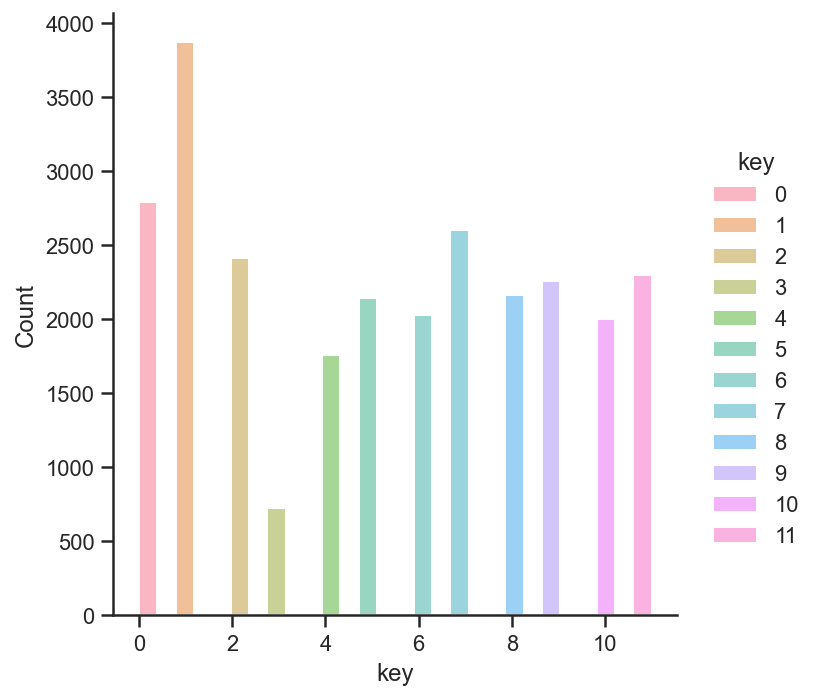

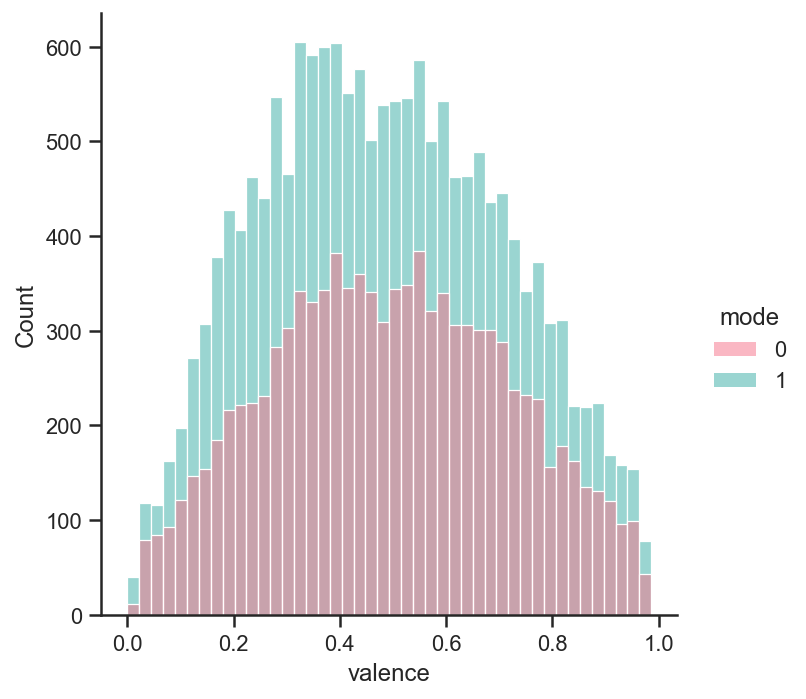

In [5]:
sns.set_theme(style="ticks")
sns.displot(x=df['key'], data=df, hue='key', palette=sns.color_palette("husl", 12))
sns.displot(x=df['valence'], data=df, hue='mode', palette=sns.color_palette("husl", 2))

#pd.plotting.scatter_matrix(df)
#sns.pairplot(df, hue='target')

In [6]:
#Printing mean values in features
for v in df:
        print("Mean of ", v, " is:", df[v].mean())
print("Mean of song popularity if it was on billboard: ", hitsflops[hitsflops['target'] == 1]['popularity'].mean())
print("Mean of song popularity if it was not on billboard: ", hitsflops[hitsflops['target'] == 0]['popularity'].mean())
print("Mean of song duration (minutes) if it was on billboard: ", df[df['target'] == 1]['duration_ms'].mean()/60000)
print("Mean of song duration (minutes) if it was not on billboard: ", df[df['target'] == 0]['duration_ms'].mean()/60000)

Mean of  danceability  is: 0.6471422218933817
Mean of  energy  is: 0.6423052375790759
Mean of  key  is: 5.244571048055936
Mean of  loudness  is: -6.8647779956346415
Mean of  mode  is: 0.624172246679738
Mean of  speechiness  is: 0.16038217602012506
Mean of  acousticness  is: 0.22328282418852433
Mean of  instrumentalness  is: 0.01959902709740668
Mean of  liveness  is: 0.19624401132033592
Mean of  valence  is: 0.48671900040694016
Mean of  tempo  is: 121.88266272058007
Mean of  duration_ms  is: 207405.69753246274
Mean of  time_signature  is: 3.945507010469461
Mean of  sections  is: 9.279419925270986
Mean of  target  is: 0.24923236284266212
Mean of  weeks  is: 81.36069697754431
Mean of  artist_popularity  is: 79.59864599903814
Mean of  artist_followers  is: 7635472.07299027
Mean of  number_of_artists  is: 1.4089748806925382
Mean of  popularity  is: 41.96267248714439
Mean of  release_year  is: 2014.8924938034108
Mean of song popularity if it was on billboard:  59.25070506160012
Mean of song 

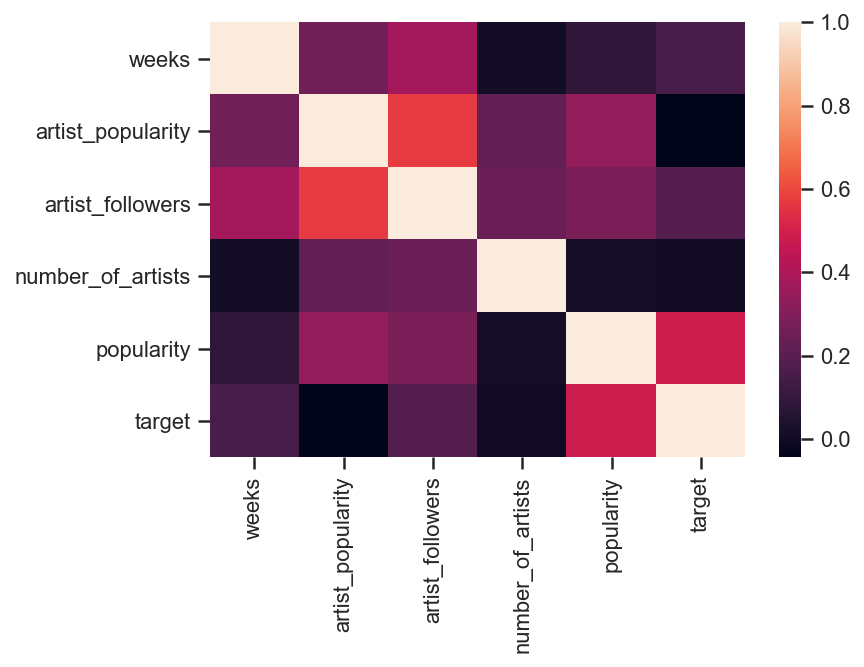

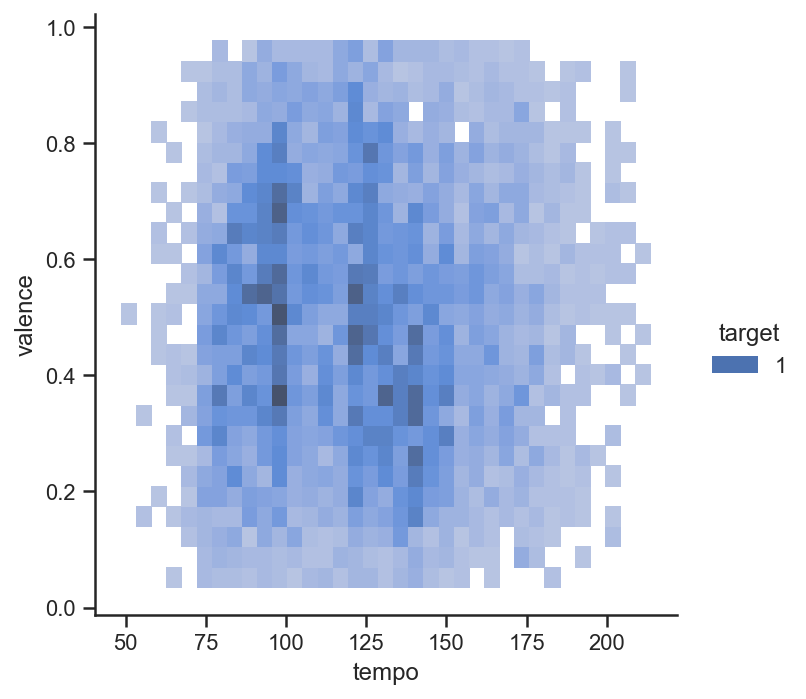

In [7]:
sns.heatmap(artist_df.corr())
sns.displot(x='tempo', y='valence', data=df[df['target'] == 1], hue='target')

In [ ]:
sns.scatterplot(x='artist_followers', y='popularity', data=df[df['artist_followers']>50000000], hue='target', size='weeks')

In [ ]:
sns.scatterplot(x='release_year', y='popularity', data=df[df['artist_followers']<1000000], hue='target', size='number_of_artists')

In [ ]:
sns.scatterplot(x='release_year', y='popularity', data=df[df['artist_followers']>50000000], hue='target', size='number_of_artists')

In [ ]:
bf = hitsflops[basiccols]
plt.figure(figsize=(10, 10))
corrplot(bf.corr(), size_scale=300);

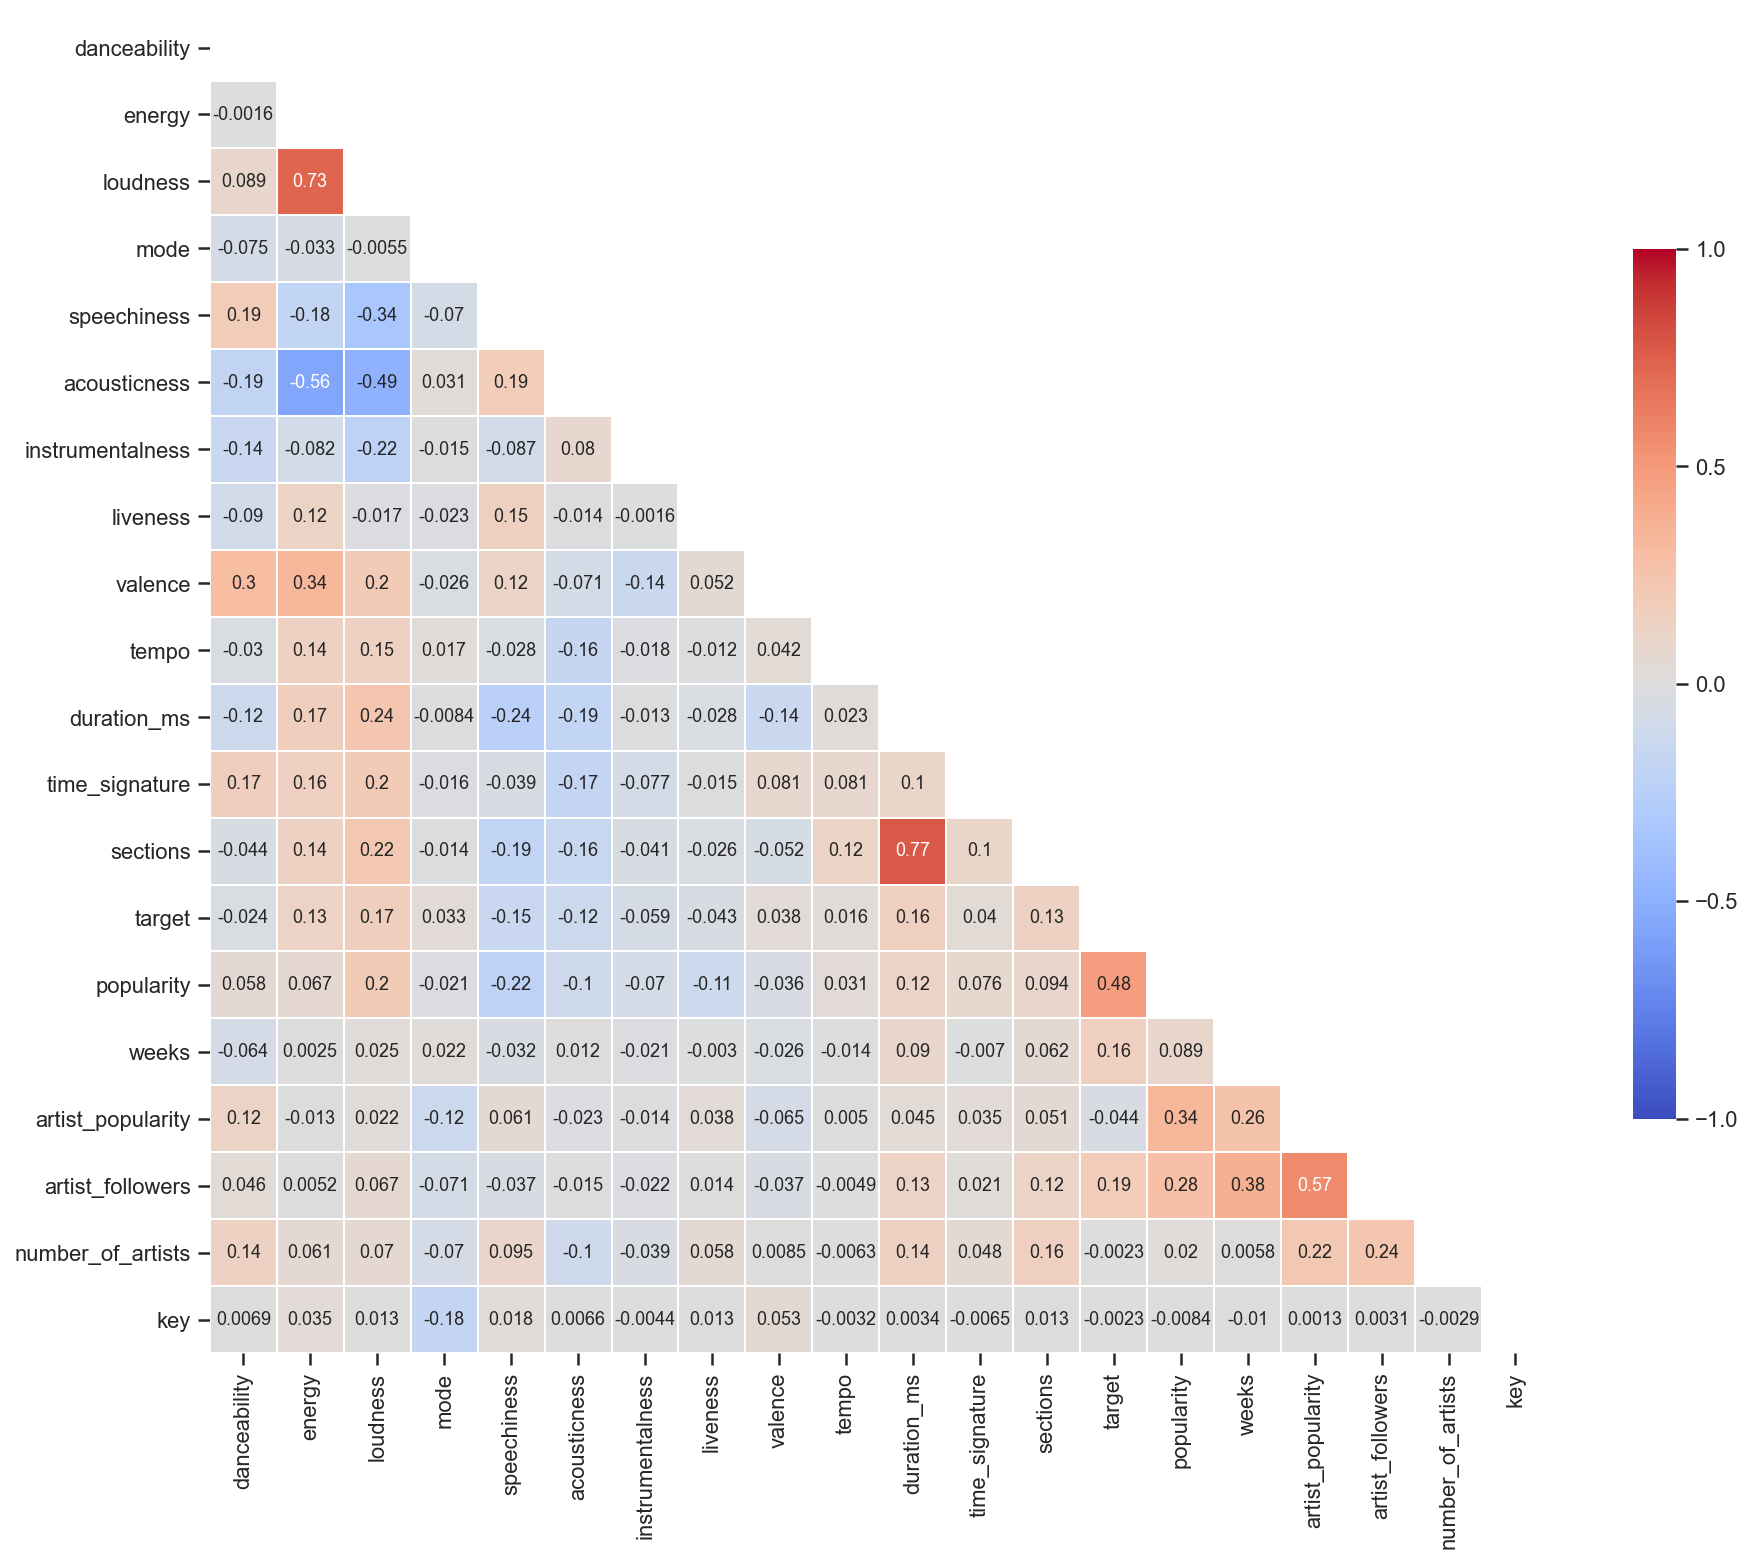

In [8]:
corr_matrix = hitsflops.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(15, 20)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 9})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

<AxesSubplot:xlabel='release_year', ylabel='Count'>

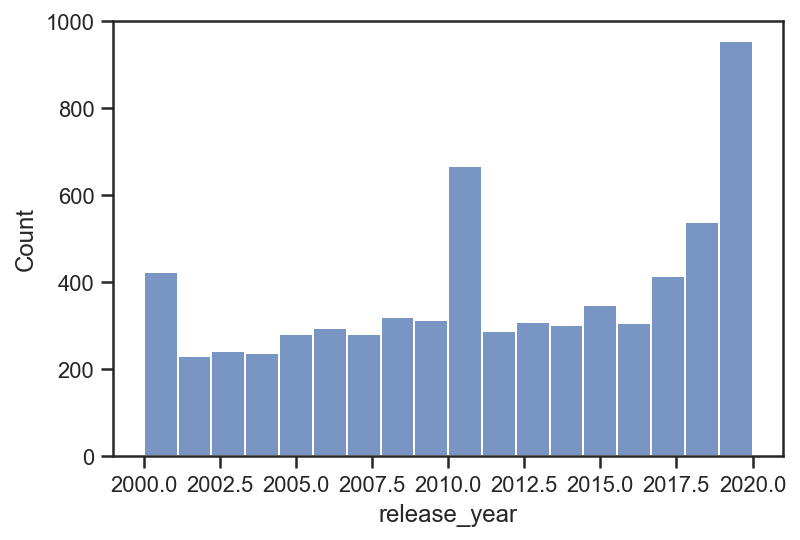

In [9]:
sns.histplot(x='release_year', data=df[df['target'] == 1])

<AxesSubplot:xlabel='release_year', ylabel='Count'>

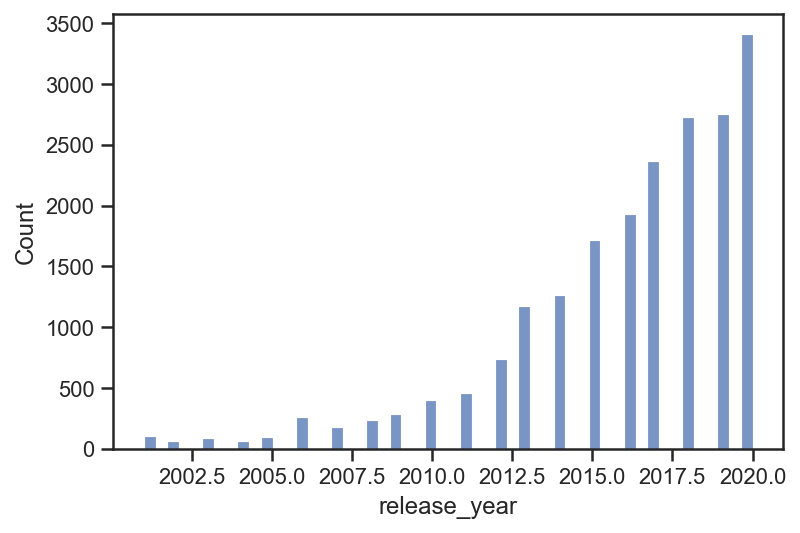

In [10]:
sns.histplot(x='release_year', data=df[df['target'] == 0])